In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import tqdm

/tmp/ipykernel_3060/3802424584.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
iris = load_iris()
dataset = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target'])
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [3]:
class Model(nn.Module):
    # define nn
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(4, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)

        return x

# Initialize Model
model = Model()

In [4]:
train_X, test_X, train_y, test_y = train_test_split(
    dataset[dataset.columns[0:4]].values, # use columns 0-4 as X
    dataset.target, # use target as y
    test_size=0.2 # use 20% of data for testing
)

# Uncomment for sanity checks
# print("train_X: ", train_X)
# print("test_X: ", test_X)
print("train_y: ", train_y)
print("test_y: ", test_y)

train_y:  13     0.0
37     0.0
31     0.0
107    2.0
69     1.0
      ... 
110    2.0
82     1.0
19     0.0
21     0.0
92     1.0
Name: target, Length: 120, dtype: float64
test_y:  98     1.0
66     1.0
28     0.0
7      0.0
11     0.0
129    2.0
90     1.0
135    2.0
99     1.0
70     1.0
45     0.0
24     0.0
26     0.0
88     1.0
63     1.0
130    2.0
119    2.0
34     0.0
139    2.0
8      0.0
49     0.0
33     0.0
85     1.0
128    2.0
124    2.0
58     1.0
103    2.0
94     1.0
117    2.0
59     1.0
Name: target, dtype: float64


In [5]:
# our loss function
loss_fn = nn.CrossEntropyLoss()

# our optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


# use 800 EPOCHS
EPOCHS = 800

# Convert training data to pytorch variables
train_X = Variable(torch.Tensor(train_X).float())
test_X = Variable(torch.Tensor(test_X).float())
train_y = Variable(torch.Tensor(train_y.values).long())
test_y = Variable(torch.Tensor(test_y.values).long())


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))


# we use tqdm for nice loading bars
for epoch in tqdm.trange(EPOCHS):

    # To train, we get a prediction from the current network
    predicted_y = model(train_X)

    # Compute the loss to see how bad or good we are doing
    loss = loss_fn(predicted_y, train_y)

    # Append the loss to keep track of our performance
    loss_list[epoch] = loss.item()

    # Afterwards, we will need to zero the gradients to reset
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate the accuracy, call torch.no_grad() to prevent updating gradients
    # while calculating accuracy
    with torch.no_grad():
        y_pred = model(test_X)
        correct = (torch.argmax(y_pred, dim=1) == test_y).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 800/800 [00:00<00:00, 1786.83it/s]


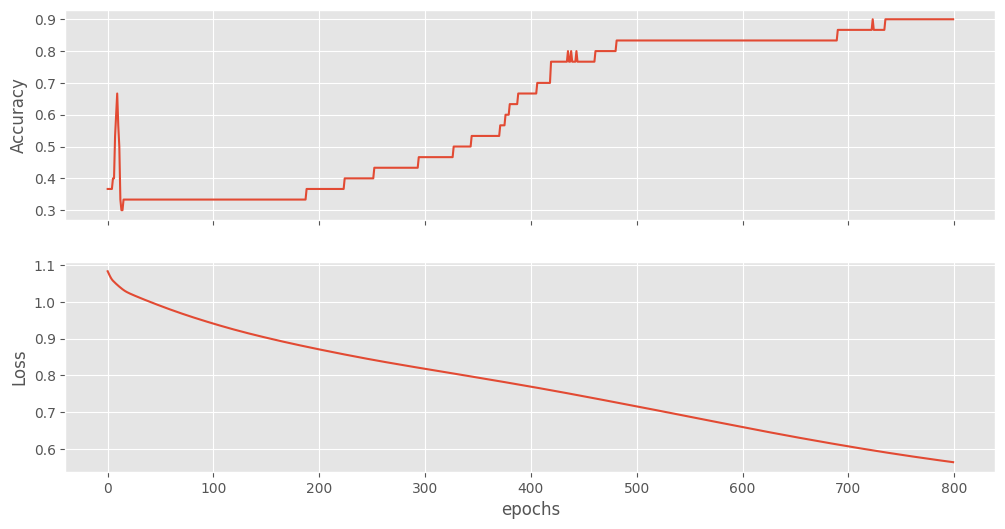

In [7]:
# Plot the Accuracy and Loss

# import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')


fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("Accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("Loss")
ax2.set_xlabel("epochs");